Given the vast amounts of fake news that we have come across all of social media platforms, there should be a way in which we can analyse and determine whether a given news post is real or not.

So the main purpose of this project is to build a simple Machine Learning application that can analyze news and give a veredict of real or not.

In this project we go step by step, first by understanding the objective and the scope, then by acquiring the data, cleaning and processing it and then training the algorithm to classify out inputs.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 5)

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

real['label'] = 'REAL'
fake['label'] = 'FAKE'

news_dataset = pd.concat([real, fake])

In [4]:
# sample of our dataset
news_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [5]:
# size of our dataset
news_dataset.shape

(44898, 5)

In [6]:
# encode our labels
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
news_dataset['label'] = l_encoder.fit_transform(news_dataset['label'])
news_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


## Count Vectorizer

We will use Count Vectorizer function to process our text body

In [7]:
x = news_dataset['text']
y = news_dataset['label']

In [78]:
vectorizer = CountVectorizer()

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=1, use_idf=True, smooth_idf=True) 

In [9]:
x = vectorizer.fit_transform(x)

In [10]:
x.shape

(44898, 122002)

In [11]:
vectorizer.vocabulary_

{'washington': 116845,
 'reuters': 92503,
 'the': 107802,
 'head': 50414,
 'of': 79135,
 'conservative': 28119,
 'republican': 91943,
 'faction': 40799,
 'in': 54634,
 'congress': 27980,
 'who': 117993,
 'voted': 116034,
 'this': 108276,
 'month': 73144,
 'for': 43360,
 'huge': 52942,
 'expansion': 40246,
 'national': 75383,
 'debt': 31756,
 'to': 109171,
 'pay': 82549,
 'tax': 106796,
 'cuts': 30481,
 'called': 22361,
 'himself': 51611,
 'fiscal': 42526,
 'on': 79658,
 'sunday': 104909,
 'and': 12004,
 'urged': 114004,
 'budget': 21258,
 'restraint': 92289,
 '2018': 4152,
 'keeping': 60599,
 'with': 118619,
 'sharp': 98572,
 'pivot': 84411,
 'under': 112677,
 'way': 117035,
 'among': 11780,
 'republicans': 91947,
 'representative': 91876,
 'mark': 68798,
 'meadows': 70194,
 'speaking': 102105,
 'cbs': 23695,
 'face': 40718,
 'nation': 75382,
 'drew': 35959,
 'hard': 49810,
 'line': 65522,
 'federal': 41649,
 'spending': 102231,
 'which': 117829,
 'lawmakers': 64093,
 'are': 13250,
 'b

In [73]:
clf = TruncatedSVD(150)
clf.fit(x)
x = clf.transform(x)

In [12]:
import pickle

In [13]:
pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
#pickle.dump(clf, open('svd_vectorizer.pkl', 'wb'))

# Splitting data 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [16]:
y_pred = pac.predict(x_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy : {round(score*100, 2)}%')

pickle.dump(pac, open('pac.pkl', 'wb'))

Accuracy : 99.6%


In [17]:
# Build model
clf = RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5,
                                        max_features='auto', bootstrap=True, verbose=0, criterion='gini')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9841870824053452

In [18]:
pickle.dump(clf, open('random_forest.pkl', 'wb'))

In [18]:
lgModel = LogisticRegression()
lgModel.fit(x_train, y_train)
lgModel.score(x_test, y_test)

0.8781954887218045

In [19]:
# Creat and Train KNN model
KNN = KNeighborsClassifier(n_neighbors=3, weights='uniform')
KNN.fit(x_train, y_train)
KNN.score(x_test, y_test)

0.843609022556391

In [20]:
filename = 'nlp_model.pkl'

In [21]:
pickle.dump(clf, open(filename, 'wb'))

## Stacking Classifier

Stacking classifier takes:
1. estimators: List of baseline classifiers

2. final_estimator: Defined meta classifier

3. cv: Number of cross validations to perform

In [22]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                                     , weights = 'distance')
                       ))
    base_models.append(('SVC', SVC(kernel = 'linear'
                                   , class_weight = 'balanced'
                                  , break_ties = True)
                       ))    
    base_models.append(('GNB', GaussianNB()))
    base_models.append(('RF', RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5,
                                        max_features='auto', bootstrap=True, verbose=0, criterion='gini'))
                       )
    
    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

def models_all():
    all_models = dict()
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                             , weights = 'distance')
    all_models['SVC']= SVC(kernel = 'linear'
                           , class_weight = 'balanced'
                          , break_ties = True
                          )
    all_models['RF']= RandomForestClassifier(max_depth=None, min_samples_split=10, min_samples_leaf=5,
                                        max_features='auto', bootstrap=True, verbose=0, criterion='gini')
    
    all_models['GNB'] = GaussianNB()
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, x_train, y_train, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [23]:
model_results = list()
models = models_all()
names = list()

# Creating a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
#   print(model_results)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.833 (0.025) 

>SVC 0.887 (0.023) 

>RF 0.869 (0.028) 

>GNB 0.696 (0.033) 

>Stacking 0.896 (0.027) 



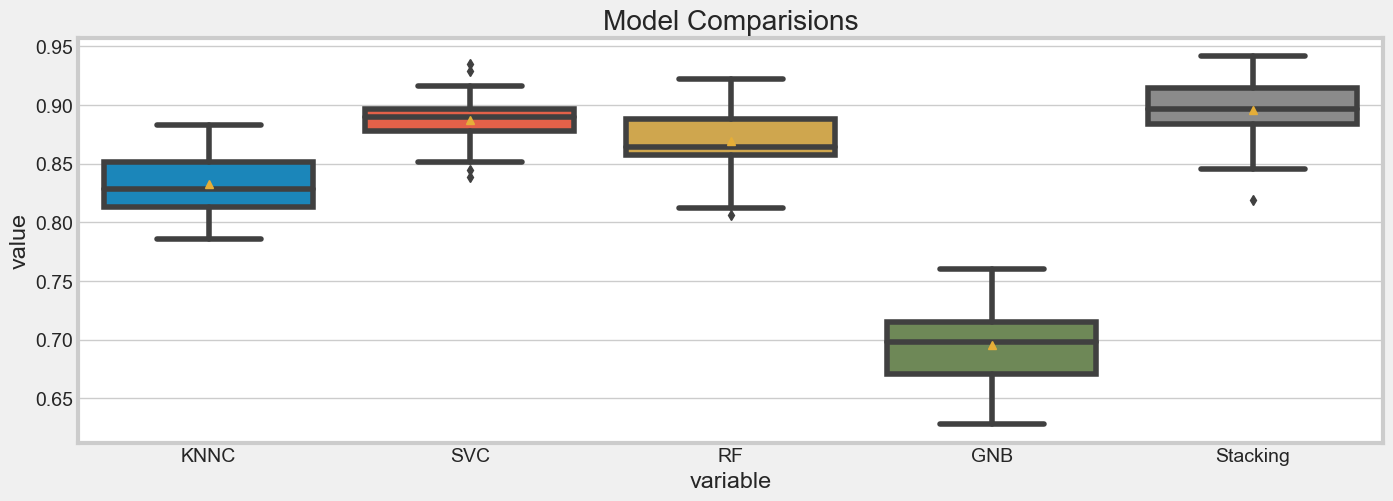

In [24]:
df_results = pd.DataFrame()
for i in range(len(model_results)):
    df_results[i] = model_results[i]
df_results.columns = names

plt.figure(figsize=(15,5))
plt.rcParams["figure.autolayout"] = True

sns.set_style("whitegrid")
fig = sns.boxplot(x="variable", y="value", data=pd.melt(df_results), showmeans=True)
plt.title("Model Comparisions")
plt.show(fig)